<a href="https://colab.research.google.com/github/tayabba-19/Customer-Conversion-Analysis-for-Online-Shopping-Using-Clickstream-Data/blob/main/Clickstream_Customer_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Conversion Analysis for Online Shopping Using Clickstream Data**

***Tayabba Zabeen***

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from xgboost import XGBClassifier, XGBRegressor
from tabulate import tabulate
import os
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
else:
    print(os.listdir(os.getcwd()))

In [ ]:
df = pd.read_csv("/kaggle/input/eshop-clothing-dataset/e-shop clothing 2008.csv")
df

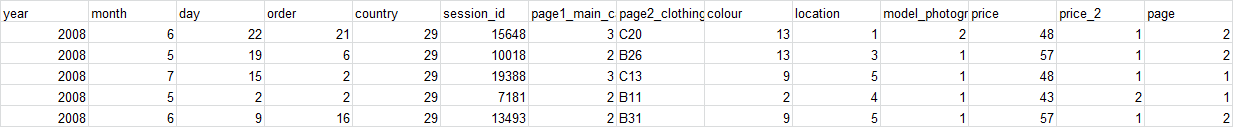
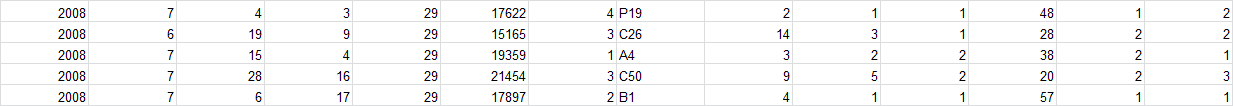

132381 rows x 14 columns

In [ ]:
country_map = {
    "1": "Australia",
    "2": "Austria",
    "3": "Belgium",
    "4": "British Virgin Islands",
    "5": "Cayman Islands",
    "6": "Christmas Island",
    '7': "Croatia",
    '8': "Cyprus",
    '9': "Czech Republic",
    '10': "Denmark",
    "11": "Estonia",
    "12": "unidentified",
    "13": "Faroe Islands",
    "14": "Finland",
    "15": "France",
    "16": "Germany",
    '17': "Greece",
    "18": "Hungary",
    "19": "Iceland",
    "20": "India",
    "21": "Ireland",
    "22": "Italy",
    "23": "Latvia",
    "24": "Lithuania",
    "25": "Luxembourg",
    "26": "Mexico",
    "27": "Netherlands",
    "28": "Norway",
    "29": "Poland",
    "30": "Portugal",
    "31": "Romania",
    '32': "Russia",
    '33': "San Marion",
    "34": "Slovakia",
    "35": "Slovenia",
    "36": "Spain",
    '37': "Sweden",
    "38": "Switzerland",
    "39": "Ukraine",
    "40": "United Arab Emirates",
    "41": "United Kingdom",
    "42": "USA",
    "43": "biz (.biz)",
    "44": "com (.com)",
    "45": "int (.int)",
    "46": "net (.net)",
    "47": "org (*.org)"
}


In [ ]:
df['country'] = df['country'].astype("string")
df["country"] = df["country"].map(country_map)

In [ ]:
page1_map = {
    1: "trousers",
    2: "skirts",
    3: "blouses",
    4: "sale"
}
df["page 1 (main category)"] = df["page 1 (main category)"].map(page1_map)

In [ ]:
location_map = {
    1: "top left",
    2: "top in the middle",
    3: "top right",
    4: 'bottom left',
    5: "bottom in the middle",
    6: "bottom right"
}

df["location"] = df["location"].map(location_map)

In [ ]:
color_map = {
    1: "beige",
    2: "black",
    3: "blue",
    4: "brown",
    5: "burgundy",
    6: "gray",
    7: "green",
    8: "navy blue",
    9: "of many colors",
    10: "olive",
    11: "pink",
    12: "red",
    13: "violet",
    14: "white"
}

df["colour"] = df["colour"].map(color_map)

In [ ]:
model_map = {
    1: "En face",
    2: "Profile"}

df["model photography"] = df["model photography"].map(model_map)

In [ ]:
month_map = {
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
}

df["month"] = df["month"].map(month_map)

**EDA**

Which country has the most website visitors?

In [ ]:
df7 = df.groupby('country')[['price']].count()
df7 = df7.sort_values(['price'], ascending=False)
df7 = df7.query("price > 100")
fig = px.bar(df7, x=df7.index, y='price')
fig.show()



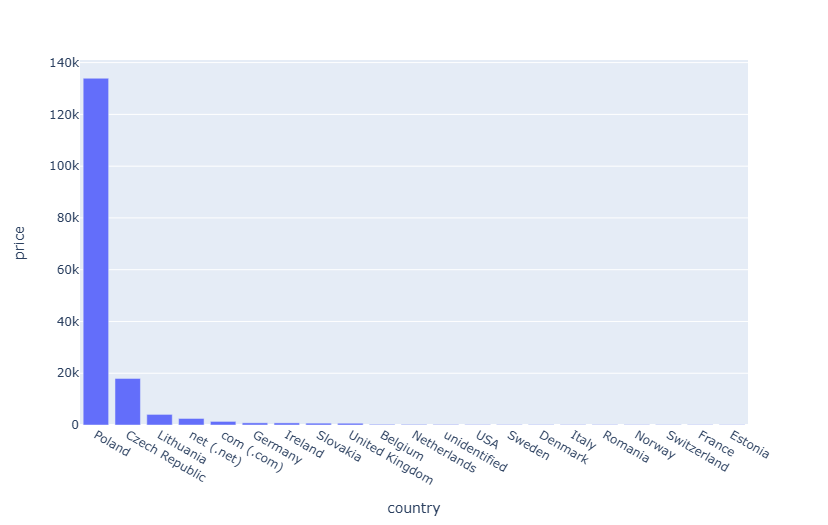

**Flexibility in buying products for each country**

In [ ]:
df8 = df.groupby('country')[['order']].sum()
df8 = df8.sort_values(['order'], ascending=False)

df9 = df.groupby('country')[['order']].count()
df9 = df9.sort_values(['order'], ascending=False)

df8['avreage_clicks'] = df8/df9
df8 = df8.sort_values(['avreage_clicks'], ascending=False)
df8 = df8.query("avreage_clicks > 3 ")

Countries like Romani and Estonia have high flexibility (It`s Great) and countries like Greece and Croatia have low flexibility. I think there are things that affect it like:

Different language that they use
stranger products that they searched
They was browsing only (viewing products)
Hardly getting their products (We will discuss this problem later)

**Relationship between month and buying from the website**

In [ ]:
df_1 = df.groupby("month")[["price"]].sum()
df_2 = df[df['month'] != 'August'].groupby("month")[["price"]].sum()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[
                    [{'type': 'domain'}, {'type': 'domain'}]])

fig.add_trace(go.Pie(labels=df_1.index, values=df_1["price"], name="All monthes"),
              1, 1)
fig.add_trace(go.Pie(labels=df_2.index, values=df_2['price'], name="All months except August"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent")

fig.update_layout(
    title_text="Relationship between month and buying from the website")


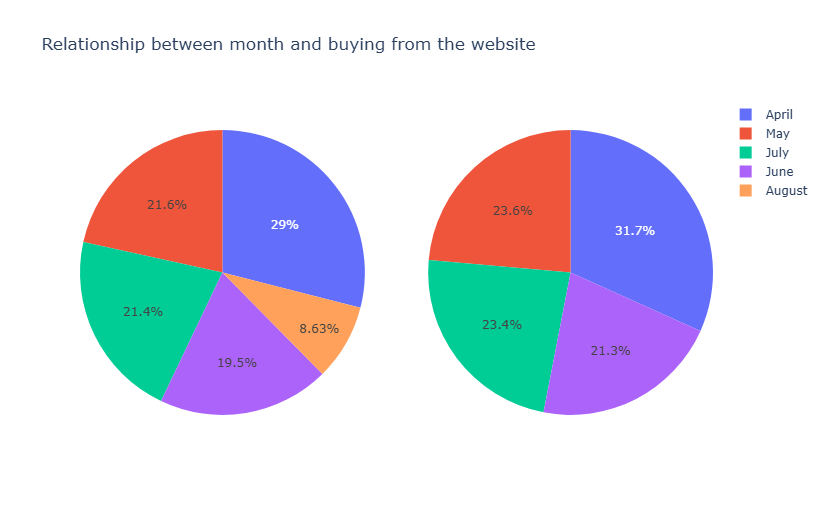

In [ ]:
df[df['month'] == 'August']['day'].unique()

In [ ]:
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

**Does users seek cheaper products ?**

In [ ]:
df_copy = df.copy()
df_copy['product price status'] = df_copy['price 2'].map({
    1: 'above average',
    2: 'below average'
}).astype('category')

plt.figure(figsize= (13, 5))
#LEFT plot: Heatmap
plt.subplot(1, 2, 1)
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ct_counts = df_copy.groupby(['page 1 (main category)', 'product price status']).size()
# Use Series.reset_index() to convert a series into a dataframe object
ct_counts = ct_counts.reset_index(name='count')
# Use DataFrame.pivot() to rearrange the data, to have page 1 (main category) names class on rows
ct_counts = ct_counts.pivot(index = 'page 1 (main category)', columns = 'product price status', values = 'count')
sns.heatmap(ct_counts, annot = True, fmt = 'd')
# RIGHT plot: Clustered box plot
plt.subplot(1, 2, 2)
sns.countplot(data = df_copy, x = 'page 1 (main category)', hue = 'product price status')
plt.show()

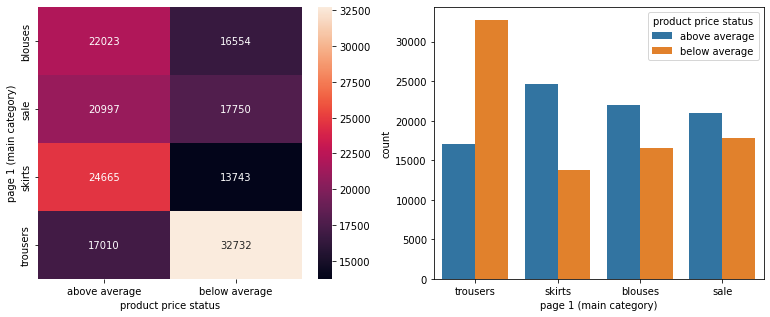

**Are more clicks on the website refer to higher sales? and is the main category related?**

In [ ]:
df11 = df.groupby(by=["order",'page 1 (main category)'])[["price"]].sum().reset_index()
fig = px.scatter(df11, x="order", y="price",color=df11['page 1 (main category)'])
fig.show()

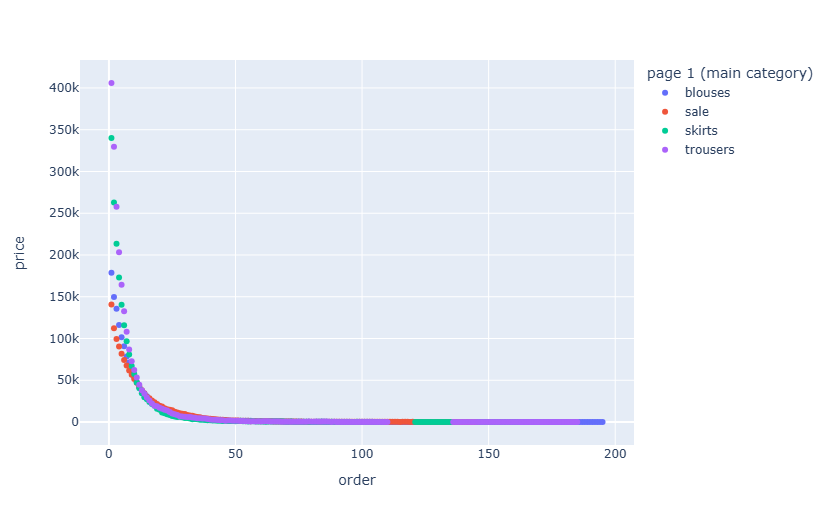

The answer for our question is NO because clicks higher than 100 are not highly selling.Generally trousers are most selling for most orders and then blouses

**What is the best selling category?**

In [ ]:
df_1 = df.groupby("page 1 (main category)")[["price"]].count()
df_2 = df.groupby("page 1 (main category)")[["price"]].sum()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles = [
                        'Total sales per Type',
                        'Total sales in dollars per Type'])

fig.add_trace(go.Pie(labels=df_1.index, values=df_1["price"], name="All monthes"),
              1, 1)
fig.add_trace(go.Pie(labels=df_2.index, values=df_2['price'], name="All months except August"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hoverinfo="label+percent")

fig.update_layout(
    title_text="Relationship between month and buying from the website")

fig.show()

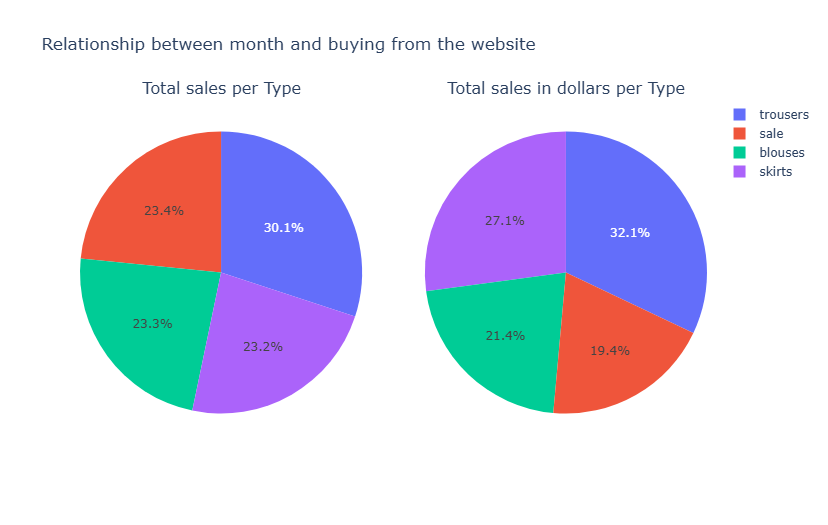

In [ ]:
It seems that trousers are prefered buying but our categories is fairly distributed

**What does customers buy from each page?**

In [ ]:
df1 = df.groupby(by=["page", "page 1 (main category)"]).size().reset_index(name="counts")

px.bar(data_frame=df1, x="page", y="counts",
       color="page 1 (main category)", barmode="group")

The first page is the best for selling specially for trousers and skirts categories
It seems also that last page is preferred for sale products
we can also conclude that:

In page 1, The trousers are better than the other products
In page 2, The skirts are better than the other products
In page 3, The blouses are better than the other products
Finnaly in page 4 and 5, users taget the sales

**What is the most attractable section in page and color of product per type?**

In [ ]:
df2 = df.groupby(by=["location", "colour"]).size().reset_index(name="counts")
fig = px.scatter(df2, x="location", y="counts",
                 color='colour', size='counts', size_max=30)
fig.show()

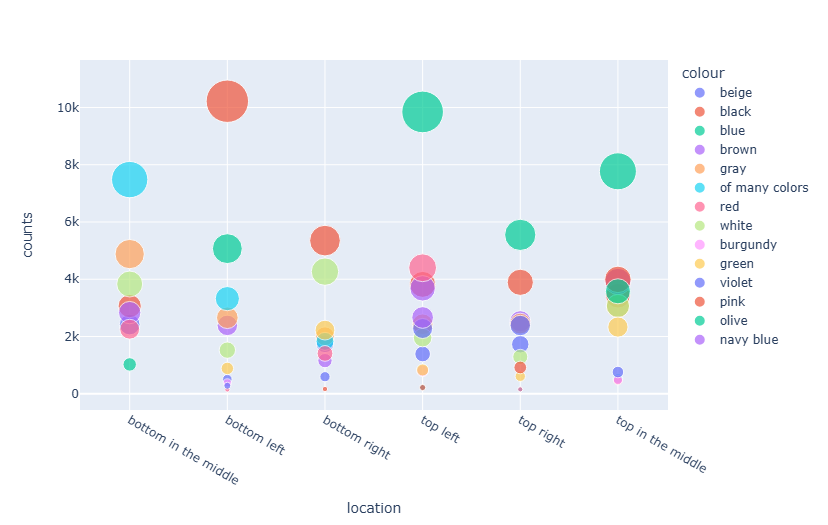

We can see:

The Bottom left and the top left are the most attractible sections on the website
Users prefer products with blue color in the top section
Users prefer products with black color in the bottom left and bottom right sections
Users prefer products that has many colors in the bottom-middle section

**Are selling products affected by colour ?**

In [ ]:
df3 = df.groupby("colour")[["price"]].sum()
df3 = df3.sort_values(['price'], ascending=False)

In [ ]:
fig = px.bar(data_frame=df3, x=df3.index, y="price", text_auto='.2s', color=df3.index,
             title="Colour of products with their prices")
fig.update_traces(textfont_size=12, textangle=0,
                  textposition="outside", cliponaxis=False)
fig.show()

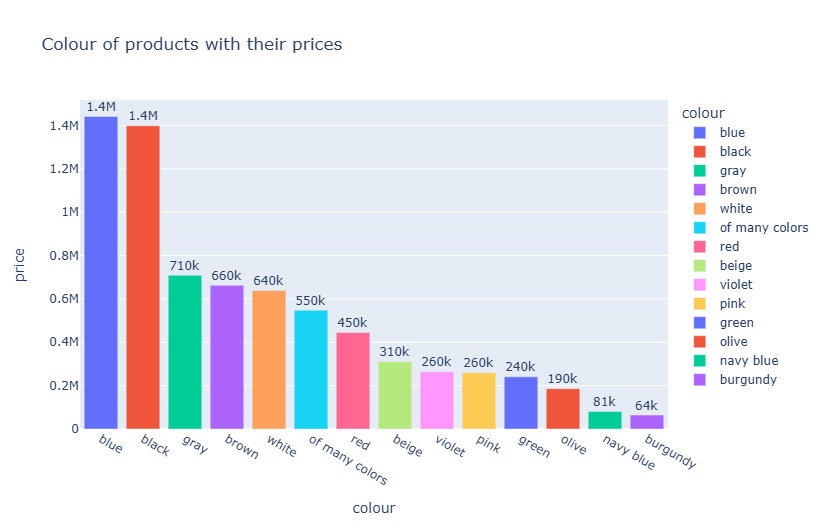

It seems that selling products is affected by color and we can conclude that:

blue and black colors are preferred for customer

**Relationship between countries and buying days**

In [ ]:
df_sum = df.groupby(by=["country", 'day'])[['price']].sum().reset_index()
df_sum = df_sum.sort_values(['price'], ascending=False)

count = df.groupby(by=["country", 'day'])[['price']].count().reset_index()
count = count.sort_values(['price'], ascending=False)

df_sum['avreage_prices'] = df_sum['price']/count['price']
df_sum = df_sum.sort_values(['avreage_prices'], ascending=False)

fig = px.scatter(df_sum, x=df_sum["country"], y=df_sum["day"],color=df_sum['avreage_prices'],size=df_sum['avreage_prices'])
fig.show()

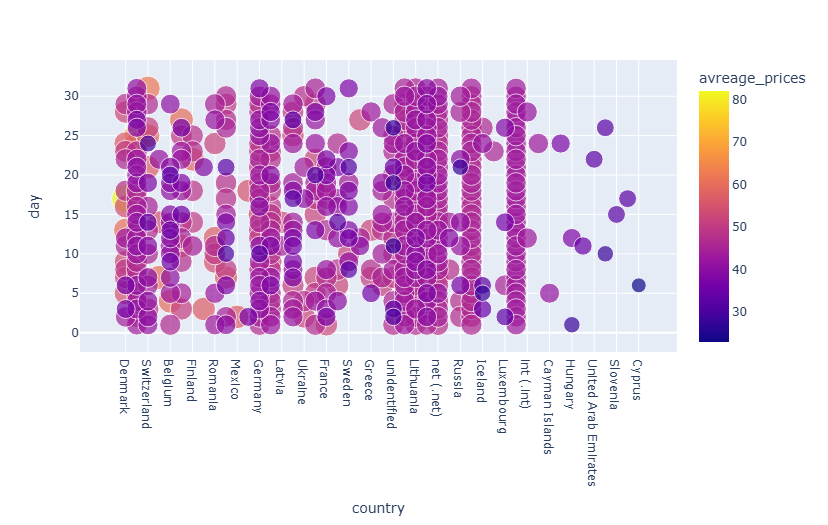

For Poland, selling products is very high in First of the month and then decreases by the last day of the month

For Czech Republic, selling products goes up and down within the days of the month

**Should we put model photography in the face of the product or in the inside the profile ?**

In [ ]:
df5 = df.groupby(by=["model photography", 'page 1 (main category)'])[
    'price'].count().reset_index(name="counts")
px.bar(data_frame=df5, x="model photography", y="counts",
       color="page 1 (main category)", barmode="group")

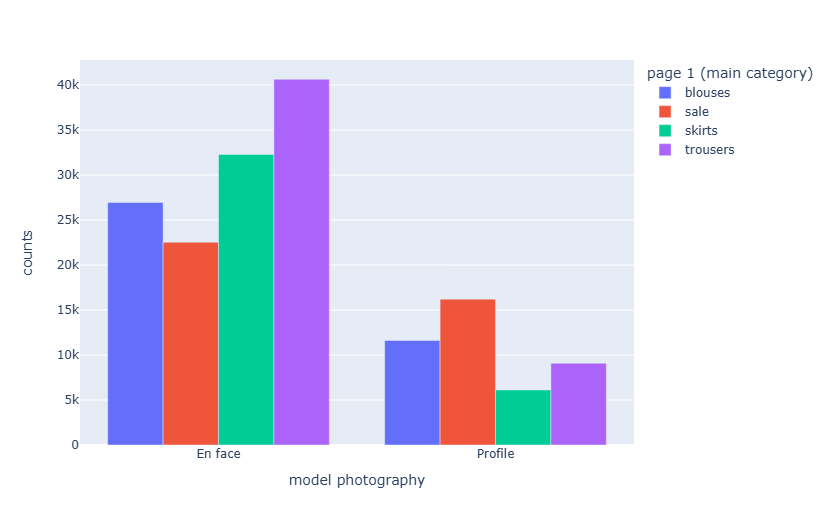

YES we should put model photography en face of the products

**Relation between sales and buying days per month**

In [ ]:
df9 = df[df['page 1 (main category)']== "sale"]
df9 = df.groupby(by=["month","day"])['page 1 (main category)'].count().reset_index(name="counts")


fig = px.scatter(df9, y='month', x="day",
                 size="counts")
fig.show()

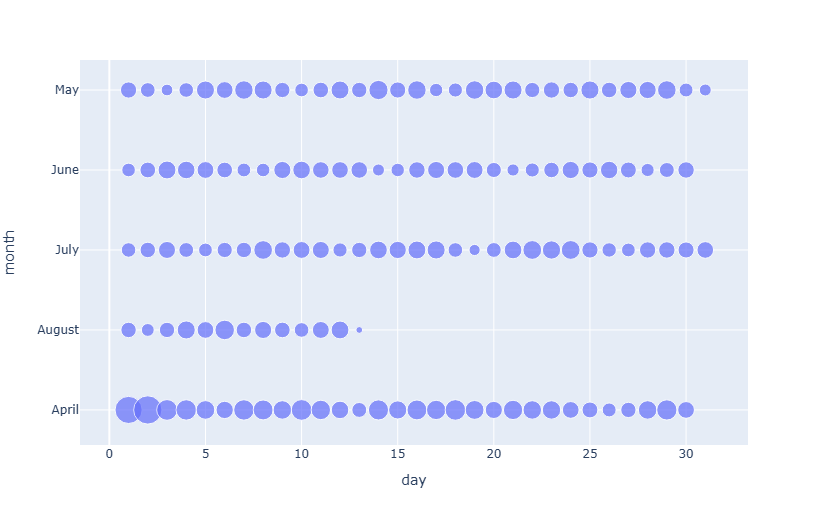

**Data Preprocessing**

**Missing Data**

In [ ]:
total = df.shape[0]
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = df[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

Great, No missing values

**Duplicates**

In [ ]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0

No duplicate rows

**Remove useless columns**

In [ ]:
df.drop('session ID', axis=1, inplace=True)

**Data Distribution**

In [ ]:
x = "price"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
sns.distplot(df_copy[x], hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df_copy[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(df_copy[x])
tmp_dtf[x] = np.log(df_copy[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

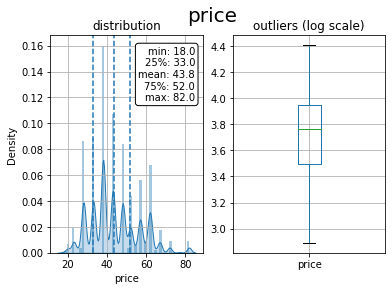

**Outliers**

In [ ]:
# for col in df:
#     if col != 'price' and is_numeric_dtype(df[col]):
#         print('-'*30)
#         fig, ax = plt.subplots(2, 1, figsize=(12, 4))
#         g1 = sns.boxplot(x = df[col], ax=ax[0])
#         g2 = sns.scatterplot(data=df, x=df[col],y=df['price'], ax=ax[1])
#         plt.show()

After inspecting the outliers, It seems to be important data

**Label Encoding**

In [ ]:
encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])
            encoders[col] = label_encoder

In [ ]:
df["price 2"] = df["price 2"] - 1

**Correlation Matrix**

In [ ]:
df_copy2 = df.drop(['price','price 2'], axis=1)
plt.figure(figsize=(10,6))
corr_matrix = df_copy2.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=0, vmax=1, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

Text(0.5, 1.0, 'pearson correlation')

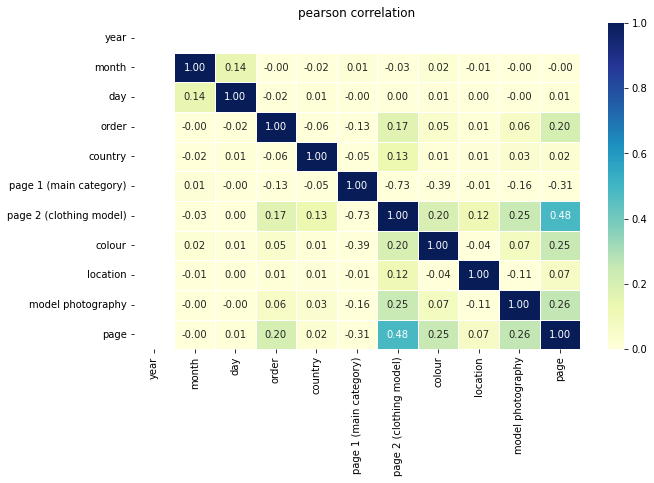

**Model Training - Classification on 'price 2'**

Splitting & Feature Scaling

In [ ]:
X = df.drop('price 2', axis=1)
y = df["price 2"]
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.20, random_state = 0)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Logistic Regression**

In [ ]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

In [ ]:
LogisticRegression(random_state=42)

In [ ]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

In [ ]:
Training Score: 0.9896053665316976
Test Score: 0.9891297779120714


**K Nearest Neighbors (KNN) classification model**

In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=4)
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

In [ ]:
Train Score: 0.9962228802804134
Test Score: 0.9927103792113612

**Random Forest Classifier**

In [ ]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 12)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)
print(study_rf.best_trial)

FrozenTrial(number=0, values=[1.0], datetime_start=datetime.datetime(2022, 10, 6, 12, 41, 7, 957166), datetime_complete=datetime.datetime(2022, 10, 6, 12, 41, 10, 831016), params={'rf_max_depth': 27, 'rf_max_features': 4}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=12, log=False, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=0, state=TrialState.COMPLETE, value=None)

In [ ]:
rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features'], max_depth = study_rf.best_trial.params['rf_max_depth'])
rf.fit(x_train, y_train)

rf_train, rf_test = rf.score(x_train, y_train), rf.score(x_test, y_test)

print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

In [ ]:
Train Score: 1.0
Test Score: 1.0

**XGBoost Gradient Boosting Model**

In [ ]:
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

In [ ]:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
xgb_train, xgb_test = xgb_model.score(x_train , y_train), xgb_model.score(x_test , y_test)

print(f"Training Score: {xgb_train}")
print(f"Test Score: {xgb_test}")

In [ ]:
Training Score: 1.0
Test Score: 1.0

**Light Gradient Boosting Model**

In [ ]:
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

In [ ]:
LGBMClassifier(random_state=42)

In [ ]:
lgb_train, lgb_test = lgb_model.score(x_train , y_train), lgb_model.score(x_test , y_test)

print(f"Training Score: {lgb_train}")
print(f"Test Score: {lgb_test}")

In [ ]:
Training Score: 1.0
Test Score: 1.0

**SKLearn AdaBoost Model**

In [ ]:
ab_model = AdaBoostClassifier(random_state=42)

In [ ]:
ab_model.fit(x_train, y_train)

In [ ]:
AdaBoostClassifier(random_state=42)

In [ ]:
ab_train, ab_test = ab_model.score(x_train , y_train), ab_model.score(x_test , y_test)

print(f"Training Score: {ab_train}")
print(f"Test Score: {ab_test}")

In [ ]:
Training Score: 1.0
Test Score: 1.0

**CatBoost Classifier Model**

In [ ]:
cb_model = CatBoostClassifier(verbose=0)

In [ ]:
cb_model.fit(x_train, y_train)

In [ ]:
<catboost.core.CatBoostClassifier at 0x7f919420cdd0>

In [ ]:
cb_train, cb_test = cb_model.score(x_train , y_train), cb_model.score(x_test , y_test)

print(f"Training Score: {cb_train}")
print(f"Test Score: {cb_test}")

In [ ]:
Training Score: 1.0
Test Score: 1.0

**SVM Model**

In [ ]:
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'linearSVC'])
    c = trial.suggest_float('c', 0.02, 1.0, step=0.02)
    if kernel in ['linear', 'rbf']:
        classifier_obj = SVC(kernel=kernel, C=c).fit(x_train, y_train)
    elif kernel == 'linearSVC':
        classifier_obj = LinearSVC(C=c).fit(x_train, y_train)
    elif kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 10)
        classifier_obj = SVC(kernel=kernel, C=c, degree=degree).fit(x_train, y_train)

    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective, n_trials=30)
print(study_svm.best_trial)

FrozenTrial(number=25, values=[0.9995392053180239], datetime_start=datetime.datetime(2022, 10, 6, 12, 59, 13, 903831), datetime_complete=datetime.datetime(2022, 10, 6, 12, 59, 25, 507397), params={'kernel': 'poly', 'c': 1.0, 'degree': 3}, distributions={'kernel': CategoricalDistribution(choices=('linear', 'rbf', 'poly', 'linearSVC')), 'c': FloatDistribution(high=1.0, log=False, low=0.02, step=0.02), 'degree': IntDistribution(high=10, log=False, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=25, state=TrialState.COMPLETE, value=None)

In [ ]:
if study_svm.best_trial.params['kernel'] in ['linear', 'rbf']:
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'])
elif study_svm.best_trial.params['kernel'] == 'linearSVC':
    SVM_model = LinearSVC(C=study_svm.best_trial.params['c'])
elif study_svm.best_trial.params['kernel'] == 'poly':
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'], degree=study_svm.best_trial.params['degree'])

SVM_model.fit(x_train, y_train)

In [ ]:
SVC(kernel='poly')

In [ ]:
SVM_train, SVM_test = SVM_model.score(x_train , y_train), SVM_model.score(x_test , y_test)

print(f"Training Score: {SVM_train}")
print(f"Test Score: {SVM_test}")

In [ ]:
Training Score: 0.9997280473801897
Test Score: 0.9995392053180239

**Summary - Classification on 'price 2'**

In [ ]:
data = [["KNN", KNN_train, KNN_test],
        ["Logistic Regression", lg_train, lg_test],
        ["Random Forest", rf_train, rf_test],
        ["XGBM", xgb_train, xgb_test],
        ["Adaboost", ab_train, ab_test],
        ["light GBM", lgb_train, lgb_test],
        ["CatBoost", cb_train, cb_test],
        ["SVM", SVM_train, SVM_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

In [ ]:
═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.996223 │     0.99271  │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.989605 │     0.98913  │
├─────────────────────┼───────────────┼──────────────┤
│ Random Forest       │      1        │     1        │
├─────────────────────┼───────────────┼──────────────┤
│ XGBM                │      1        │     1        │
├─────────────────────┼───────────────┼──────────────┤
│ Adaboost            │      1        │     1        │
├─────────────────────┼───────────────┼──────────────┤
│ light GBM           │      1        │     1        │
├─────────────────────┼───────────────┼──────────────┤
│ CatBoost            │      1        │     1        │
├─────────────────────┼───────────────┼──────────────┤
│ SVM                 │      0.999728 │     0.999539 │
╘═════════════════════╧═══════════════╧══════════════╛

Conclusion: for this problem, all models yielded great results

**Model Selection - Regression on 'price'**

**Splitting**

In [ ]:
x = df.drop(columns=['price'])
y = df.price

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Linear Regression**

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

In [ ]:
LinearRegression()

In [ ]:
lr_train, lr_test = lr_model.score(x_train , y_train), lr_model.score(x_test , y_test)

print(f"Training Score: {lr_train}")
print(f"Test Score: {lr_test}")

In [ ]:
Training Score: 0.7736351990480395
Test Score: 0.7764506317157037

**K Nearest Neighbors (KNN) Regressor**

In [ ]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, step=2)
    classifier_obj = KNeighborsRegressor(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=30)
print(study_KNN.best_trial)

FrozenTrial(number=9, values=[0.9691819335320631], datetime_start=datetime.datetime(2022, 10, 6, 13, 5, 57, 752438), datetime_complete=datetime.datetime(2022, 10, 6, 13, 6, 3, 274415), params={'KNN_n_neighbors': 6}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=2)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=9, state=TrialState.COMPLETE, value=None)

In [ ]:
KNR_model = KNeighborsRegressor(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNR_model.fit(x_train, y_train)

KNR_train, KNR_test = KNR_model.score(x_train, y_train), KNR_model.score(x_test, y_test)

print(f"Train Score: {KNR_train}")
print(f"Test Score: {KNR_test}")

In [ ]:
Train Score: 0.9793132844225859
Test Score: 0.9691819335320631

**Random Forest Regressor**

In [ ]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 12, log=False)
    classifier_obj = RandomForestRegressor(max_features = rf_max_features, max_depth = rf_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_rfr = optuna.create_study(direction='maximize')
study_rfr.optimize(objective, n_trials=30)
print(study_rfr.best_trial)

FrozenTrial(number=12, values=[0.9999989904364716], datetime_start=datetime.datetime(2022, 10, 6, 13, 10, 24, 162188), datetime_complete=datetime.datetime(2022, 10, 6, 13, 10, 39, 868062), params={'rf_max_depth': 18, 'rf_max_features': 12}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=12, log=False, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=12, state=TrialState.COMPLETE, value=None)

In [ ]:
rfr = RandomForestRegressor(max_features = study_rfr.best_trial.params['rf_max_features'], max_depth = study_rfr.best_trial.params['rf_max_depth'])

rfr.fit(x_train, y_train)
rfr_train, rfr_test = rfr.score(x_train, y_train), rfr.score(x_test, y_test)

print(f"Train Score: {rfr_train}")
print(f"Test Score: {rfr_test}")

In [ ]:
Train Score: 0.9999996598833932
Test Score: 0.9999989904364716

**XGBoost Gradient Boosting Regressor**

In [ ]:
xgbr_model = XGBRegressor()
xgbr_model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [ ]:
xgbr_train, xgbr_test = xgbr_model.score(x_train , y_train), xgbr_model.score(x_test , y_test)

print(f"Training Score: {xgbr_train}")
print(f"Test Score: {xgbr_test}")

In [ ]:
Training Score: 0.9999996582890976
Test Score: 0.9999996657009846

**Light Gradient Boosting Model**

In [ ]:
lgbr_model = LGBMRegressor()
lgbr_model.fit(x_train, y_train)

LGBMRegressor()

In [ ]:
lgbr_train, lgbr_test = lgbr_model.score(x_train , y_train), lgbr_model.score(x_test , y_test)

print(f"Training Score: {lgbr_train}")
print(f"Test Score: {lgbr_test}")

In [ ]:
Training Score: 0.9997065682071354
Test Score: 0.9997175790970568

**SKLearn AdaBoost Model**

In [ ]:
abr_model = AdaBoostRegressor()
abr_model.fit(x_train, y_train)

AdaBoostRegressor()

In [ ]:
abr_train, abr_test = abr_model.score(x_train , y_train), abr_model.score(x_test , y_test)

print(f"Training Score: {abr_train}")
print(f"Test Score: {abr_test}")

In [ ]:
Training Score: 0.8852492219082346
Test Score: 0.8854136433039486

**CatBoost Classifier Model**

In [ ]:
cbr_model = CatBoostRegressor(verbose=0)
cbr_model.fit(x_train, y_train)

<catboost.core.CatBoostRegressor at 0x7f9194075450>

In [ ]:
cbr_train, cbr_test = cbr_model.score(x_train , y_train), cbr_model.score(x_test , y_test)

print(f"Training Score: {cbr_train}")
print(f"Test Score: {cbr_test}")

In [ ]:
Training Score: 0.9999982316018718
Test Score: 0.9999979619529021

**SVR Model**

In [ ]:
SVR_model = SVR(kernel='rbf')

SVR_model.fit(x_train, y_train)

In [ ]:
SVR_train, SVR_test = SVR_model.score(x_train , y_train), SVR_model.score(x_test , y_test)

print(f"Training Score: {SVR_train}")
print(f"Test Score: {SVR_test}")

In [ ]:
Training Score: 0.9326950603482219
Test Score: 0.9306723872249485

**Summary - Regression on 'price 2'**

In [ ]:
data = [["KNN Regressor", KNR_train, KNR_test],
        ["Logistic Regression", lr_train, lr_test],
        ["Random Forest Regressor", rfr_train, rfr_test],
        ["XGBM", xgbr_train, xgbr_test],
        ["Adaboost", abr_train, abr_test],
        ["light GBM", lgbr_train, lgbr_test],
        ["CatBoost", cbr_train, cbr_test],
        ["SVM", SVR_train, SVR_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

In [ ]:
╒═════════════════════════╤═══════════════╤══════════════╕
│ Model                   │   Train Score │   Test Score │
╞═════════════════════════╪═══════════════╪══════════════╡
│ KNN Regressor           │      0.979313 │     0.969182 │
├─────────────────────────┼───────────────┼──────────────┤
│ Logistic Regression     │      0.773635 │     0.776451 │
├─────────────────────────┼───────────────┼──────────────┤
│ Random Forest Regressor │      1        │     0.999999 │
├─────────────────────────┼───────────────┼──────────────┤
│ XGBM                    │      1        │     1        │
├─────────────────────────┼───────────────┼──────────────┤
│ Adaboost                │      0.885249 │     0.885414 │
├─────────────────────────┼───────────────┼──────────────┤
│ light GBM               │      0.999707 │     0.999718 │
├─────────────────────────┼───────────────┼──────────────┤
│ CatBoost                │      0.999998 │     0.999998 │
├─────────────────────────┼───────────────┼──────────────┤
│ SVM                     │      0.932695 │     0.930672 │
╘═════════════════════════╧═══════════════╧══════════════╛

**Conclusion**

The clickstream customer conversion analysis successfully revealed how users navigate the online shopping platform and what factors influence their purchase decisions. By examining page visits, dwell time, add-to-cart actions, bounce behavior, and drop-off points, we identified clear patterns between user engagement and final conversion. The findings indicate that conversion is strongly affected by product page quality, checkout complexity, loading speed, and targeted recommendations. Improving website personalization and reducing friction in the checkout journey can directly enhance conversion rates.

Overall, the study demonstrates that optimized click paths, faster site response, and data-driven customer journey retargeting not only increase engagement but also significantly boost customer conversion and revenue growth.

**STREAMLIT APPLICATION**

In [ ]:
!pip install streamlit pandas matplotlib seaborn --quiet


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

st.title("Customer Conversion Analysis - GitHub Data Demo")

# Direct raw CSV link from GitHub
url = "https://raw.githubusercontent.com/tayabba-19/Customer-Conversion-Analysis-for-Online-Shopping-Using-Clickstream-Data/main/Clickstream_Customer_Conversion.csv"
df = pd.read_csv(url)

st.write("### Dataset Preview")
st.write(df.head())

# Conversion counts
if 'Converted' in df.columns:
    st.write("### Conversion Counts")
    fig, ax = plt.subplots()
    sns.countplot(x='Converted', data=df, ax=ax)
    st.pyplot(fig)

    st.write("### Conversion Rate")
    conv_rate = df['Converted'].mean()*100
    st.metric("Conversion Rate", f"{conv_rate:.2f}%")
else:
  st.warning("Column 'Converted' not found!")
  # Page visit counts
if 'Page' in df.columns:
    st.write("### Page Visit Counts")
    fig2, ax2 = plt.subplots()
    plt.xticks(rotation=45)
    sns.countplot(y='Page', data=df, ax=ax2)
    st.pyplot(fig2)

st.write("---")
st.write("✅ App ready for teacher evaluation")



In [ ]:
!streamlit run app.py


Collecting usage statistics. To deactivate, set browser.gatherUsageStats to false.


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.71.2.75:8501


https://dtrrqkkpmek7vqwhbhir8d.streamlit.app/